In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.metrics import average_precision_score, roc_auc_score
from malnis import show

# plt.style.use('seaborn-whitegrid')
import seaborn as sns
sns.set(style = "whitegrid")

In [33]:
data_folder = "/home/jarobyte/scratch/malnis_dataset/data/classical_models"

In [34]:
names = os.listdir(data_folder)
len(names)

4

In [35]:
predictions = [np.load(data_folder + "/" + m) for m in names]
len(predictions)

4

In [36]:
lstm_sbert = np.load("/home/jarobyte/scratch/malnis_dataset/lstm/sbert/predictions/13932670_9.npy")
names.append("lstm_sbert.npy")
predictions.append(lstm_sbert)

In [37]:
lstm_specter = np.load("/home/jarobyte/scratch/malnis_dataset/lstm/specter/predictions/13925873_9.npy")
names.append("lstm_specter.npy")
predictions.append(lstm_specter)

In [38]:
transformer_sbert = np.load("/home/jarobyte/scratch/malnis_dataset/transformer/sbert/predictions/13932680_10.npy")
names.append("transformer_sbert.npy")
predictions.append(transformer_sbert)

In [39]:
transformer_specter = np.load("/home/jarobyte/scratch/malnis_dataset/transformer/specter/predictions/14158104_4.npy")
names.append("transformer_specter.npy")
predictions.append(transformer_specter)

In [40]:
mlp_sbert = np.load("/home/jarobyte/scratch/malnis_dataset/mlp_pytorch/sbert/predictions/14628727_2.npy")
names.append("mlp_sbert.npy")
predictions.append(mlp_sbert)

In [41]:
mlp_specter = np.load("/home/jarobyte/scratch/malnis_dataset/mlp_pytorch/specter/predictions/14678619_2.npy")
names.append("mlp_specter.npy")
predictions.append(mlp_specter)

In [42]:
mlp_words = np.load("/home/jarobyte/scratch/malnis_dataset/mlp_tfidf/words/predictions/15010241_7.npy")
names.append("mlp_words.npy")
predictions.append(mlp_words)

In [43]:
mlp_chars = np.load("/home/jarobyte/scratch/malnis_dataset/mlp_tfidf/chars/predictions/14986643_2.npy")
names.append("mlp_chars.npy")
predictions.append(mlp_chars)

In [44]:
len(names), len(predictions)

(12, 12)

In [45]:
[x.shape for x in predictions]

[(264918,),
 (264918,),
 (264918,),
 (264918,),
 (264918,),
 (264918,),
 (264918,),
 (264918,),
 (264918,),
 (264918,),
 (264918,),
 (264918,)]

In [46]:
[x.min() for x in predictions]

[0.0,
 0.0,
 0.0,
 0.060099937,
 4.4960443e-35,
 0.0,
 1.7889194e-07,
 8.308031e-21,
 0.00038413805,
 1.3465447e-05,
 1.6760275991150592e-41,
 8.578993984138202e-19]

In [47]:
[x.max() for x in predictions]

[0.6226536469622973,
 0.8849211,
 0.6265156074666344,
 0.97001946,
 1.0,
 1.0,
 0.99999976,
 1.0,
 0.35483286,
 0.44589433,
 0.7959132122201866,
 0.48493222346083753]

In [54]:
dev = pd.read_pickle("/home/jarobyte/scratch/malnis_dataset/data/data_dev.pkl")

targets = np.concatenate(dev.relevance.to_list())
print("targets", targets.shape)

targets (264918,)


In [57]:
df = pd.DataFrame({"name":names, "predictions":predictions})\
.assign(
    name = lambda df: df.name.map(
        lambda x: x[:-4].replace("_", " ")\
        .replace("tfidf", "TFIDF")\
        .replace("lstm", "LSTM")\
        .replace("transformer", "Transformer")\
        .replace("sbert", "SBERT")\
        .replace("specter", "SPECTER")
        .replace("mlp", "MLP")\
        .replace("words", "Words")\
        .replace("chars", "Chars")
    ),
    average_precision = lambda df: df.predictions.map(lambda x: average_precision_score(targets, x)),
    roc_auc = lambda df: df.predictions.map(lambda x: roc_auc_score(targets, x))
)\
.drop(columns = "predictions")\
.sort_values("roc_auc", ascending = True)\
.set_index("name")\
.rename(columns = dict(average_precision = "Average Precision", roc_auc = "ROC AUC"))\
.round(3)

show(df, 20)

(12, 2)


,Average Precision,ROC AUC
name,,
SPECTER,0.051,0.584
SBERT,0.066,0.640
Transformer SBERT,0.127,0.650
MLP SBERT,0.063,0.666
Transformer SPECTER,0.123,0.677
MLP SPECTER,0.074,0.696
LSTM SBERT,0.132,0.701
LSTM SPECTER,0.179,0.707
TFIDF Chars,0.098,0.717


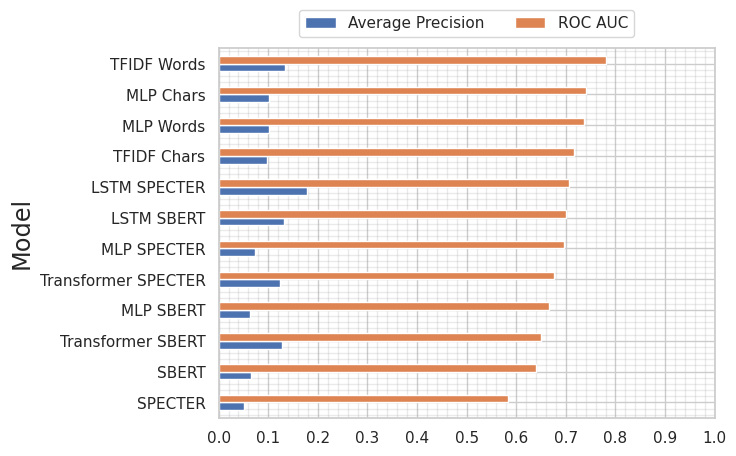

In [58]:
df.plot.barh()
plt.legend(
    bbox_to_anchor=(0.5, 1.125), 
    loc="upper center",
    ncol = 2,
#     title = "Metric"
)
plt.xlim(0, 1)
plt.xticks(np.linspace(0, 1, 11))
plt.ylabel("Model", fontsize = "x-large")
plt.minorticks_on()
# plt.tick_params(axis = "x", which = "minor", length = 20)
plt.grid(visible = True, which = 'minor', color='#999999', linestyle='-', alpha=0.2)
plt.show()